In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm

# 1. Introduction

## 1.1 Business Problem

One of the pivotal challenges in the realm of e-commerce pertains to the accurate computation of post-purchase ratings for products. Addressing this issue not only fosters heightened customer satisfaction for the e-commerce platform but also serves to accentuate product visibility for sellers, thereby ensuring a seamless shopping experience for purchasers. Another noteworthy concern involves the appropriate sorting of product reviews. Given that misleading reviews can exert a direct impact on product sales, the repercussions encompass both financial losses and customer attrition. Effectively resolving these two foundational issues holds the promise of augmenting sales for e-commerce entities and sellers, while concurrently facilitating a frictionless completion of the purchasing journey for customers.


## 1.2 Dataset Story

This dataset comprises Amazon product information, including diverse metadata and product categories. Specifically, it features user ratings and reviews for the product within the electronics category that has garnered the highest number of reviews.

## 1.3 Features

- `reviewerID` - Unique identifier for the reviewer
- `asin` - Unique identifier for the product
- `reviewerName` - Username of the reviewer
- `helpful` - Degree of helpfulness of the review
- `reviewText` - Detailed review text
- `overall` - Overall rating given to the product
- `summary` - Brief summary of the review
- `unixReviewTime` - Timestamp of the review in Unix format
- `reviewTime` - Human-readable timestamp of the review
- `day_diff` - Number of days elapsed since the review
- `helpful_yes` - Number of users finding the review helpful
- `total_vote` - Total number of votes received by the review

# 2. Data Handling

## 2.1 Loading Data

In [2]:
# Load the dataset
reviews = pd.read_csv('amazon_review.csv', parse_dates=['reviewTime'])

In [3]:
# Display the first few rows
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


## 2.2 Inspecting Data

In [4]:
# Display basic statistics about the dataset
reviews.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000


In [5]:
# Display information about the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      4915 non-null   object        
 1   asin            4915 non-null   object        
 2   reviewerName    4914 non-null   object        
 3   helpful         4915 non-null   object        
 4   reviewText      4914 non-null   object        
 5   overall         4915 non-null   float64       
 6   summary         4915 non-null   object        
 7   unixReviewTime  4915 non-null   int64         
 8   reviewTime      4915 non-null   datetime64[ns]
 9   day_diff        4915 non-null   int64         
 10  helpful_yes     4915 non-null   int64         
 11  total_vote      4915 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 460.9+ KB


In [6]:
# Identify columns with null values
reviews.isnull().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [7]:
# Get the number of unique values in each column
reviews.nunique()

reviewerID        4915
asin                 1
reviewerName      4594
helpful             42
reviewText        4912
overall              5
summary           3885
unixReviewTime     690
reviewTime         690
day_diff           690
helpful_yes         23
total_vote          26
dtype: int64

## 2.3 Data Cleaning and Preprocessing

In [8]:
# Categorize reviews into recency quantiles
reviews['quantile'] = pd.qcut(reviews['day_diff'], q=[0, 0.25, 0.50, 0.75, 1.0],
                              labels=['Most Recent', 'Recent', 'Somewhat Dated', 'Outdated'])

reviews

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,quantile
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,Most Recent
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,Recent
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,Outdated
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,Recent
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,Somewhat Dated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0,Somewhat Dated
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.0,Great item!,1377129600,2013-08-22,473,0,0,Somewhat Dated
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0,Most Recent
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.0,Great little card,1379289600,2013-09-16,448,0,0,Somewhat Dated


In [9]:
# Calculate the number of users finding the review not helpful
reviews['helpful_no'] = reviews['total_vote'] - reviews['helpful_yes']

# Select columns to keep
columns_to_keep = ['reviewTime', 'day_diff', 'overall', 'helpful_yes', 'helpful_no', 'total_vote',
                   'quantile']

# Create a new DataFrame with selected columns for improved visualization
reviews = reviews[columns_to_keep].copy()

In [10]:
# Calculate the helpfulness score difference for each review
reviews['helpfulness_score_diff'] = reviews.apply(lambda x: x['helpful_yes'] - x['helpful_no'], axis=1)

In [11]:
def calculate_rating_percentage(upvotes, downvotes):
    """
    Calculate the percentage of positive ratings based on the number of upvotes and downvotes.

    Parameters:
    - upvotes (int): The number of upvotes.
    - downvotes (int): The number of downvotes.

    Returns:
    float: The calculated percentage of positive ratings. Returns 0 if there are no votes.
    """
    # Check if there are no votes to avoid division by zero
    if upvotes + downvotes == 0:
        return 0

    # Calculate the percentage of positive ratings
    rating_percentage = upvotes / (upvotes + downvotes)

    return rating_percentage


# Calculate the percentage of positive votes
reviews['positive_vote_percentage'] = reviews.apply(
    lambda x: calculate_rating_percentage(x['helpful_yes'], x['helpful_no']), axis=1)

In [12]:
def wilson_lower_bound(upvotes, downvotes, confidence=0.95):
    """
    Calculate the Wilson Lower Bound (WLB) score, a metric for ranking items based on user votes.

    The WLB score represents the lower bound of the confidence interval for the true positive rate
    (upvote proportion) in a Bernoulli distribution. It is commonly used for ranking products or items
    based on user feedback.

    Parameters
    ----------
    upvotes : int
        The number of positive votes (e.g., likes, thumbs up).
    downvotes : int
        The number of negative votes (e.g., dislikes, thumbs down).
    confidence : float, optional
        The confidence level for the interval, by default 0.95.

    Returns
    -------
    float
        The calculated Wilson Lower Bound score, providing a measure of item ranking based on user votes.
    """
    # Total number of votes
    n = upvotes + downvotes

    # Check if there are no votes to avoid division by zero
    if n == 0:
        return 0

    # Calculate the Z-score for the given confidence level
    z = norm.ppf(1 - (1 - confidence) / 2)

    # Estimate the proportion of positive votes
    p_hat = 1.0 * upvotes / n

    # Calculate the Wilson Lower Bound score
    wilson_score = (p_hat + z ** 2 / (2 * n) - z * math.sqrt((p_hat * (1 - p_hat) + z ** 2 / (4 * n)) / n)) / (
            1 + z ** 2 / n)

    return wilson_score


# Calculate the WLB score
reviews['wilson_lower_bound'] = reviews.apply(lambda x: wilson_lower_bound(x['helpful_yes'], x['helpful_no']), axis=1)

In [13]:
def categorize_columns(df, cat_th=10, high_card_th=20):
    """
    Categorizes columns in a DataFrame based on specified thresholds.

    Parameters:
    - df: DataFrame
    - cat_thresh: Threshold for considering a column as categorical (default is 10)
    - high_card_thresh: Threshold for considering a categorical column as having high cardinality (default is 20)

    Returns:
    - cat_cols: List of categorical columns
    - num_cols: List of numerical columns
    - high_card_cat_cols: List of categorical columns with high cardinality
    """

    # Identify categorical columns with high cardinality
    high_card_cols = [col for col in df.columns if
                      df[col].dtype in ["category", "object"] and df[col].nunique() > high_card_th]

    # Identify numerical columns that are treated as categorical
    num_but_cat_cols = [col for col in df.columns if
                        df[col].dtype in ["float64", "int64"] and df[col].nunique() < cat_th]

    # Identify categorical columns
    cat_cols = [col for col in df.columns if
                (df[col].dtype in ["category", "object", "bool"] and col not in high_card_cols) or
                (col in num_but_cat_cols)]

    # Identify numerical columns
    num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in cat_cols]

    # Print dataset overview
    print(f"Dataset Overview:")
    print(f" - Total Columns: {df.shape[1]}")
    print(f" - Numerical Columns: {len(num_cols)}")
    print(f" - Numerical Columns Treated as Categorical: {len(num_but_cat_cols)}")
    print(f" - Categorical Columns: {len(cat_cols)}")
    print(f" - Columns with High Cardinality: {len(high_card_cols)}")

    return cat_cols, num_cols, high_card_cols


# Categorize columns of the dataset
cat_cols, num_cols, high_card_cols = categorize_columns(reviews)

Dataset Overview:
 - Total Columns: 10
 - Numerical Columns: 7
 - Numerical Columns Treated as Categorical: 1
 - Categorical Columns: 2
 - Columns with High Cardinality: 0


# 3. Data Visualization

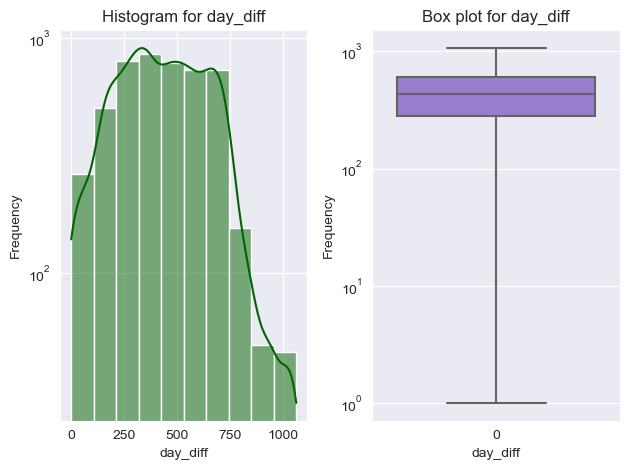

343     26
160     23
129     22
310     21
452     20
        ..
490      1
836      1
1033     1
806      1
138      1
Name: day_diff, Length: 690, dtype: int64


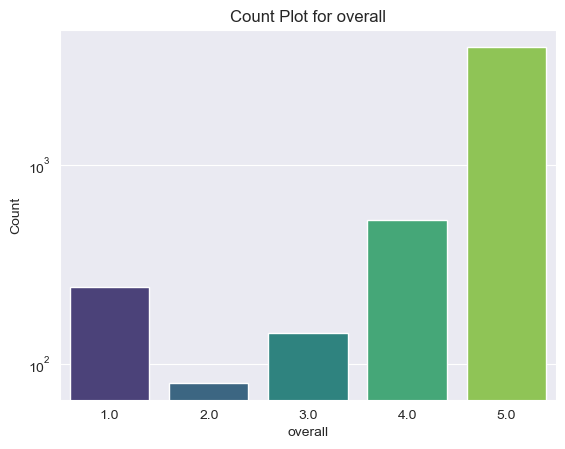

5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64


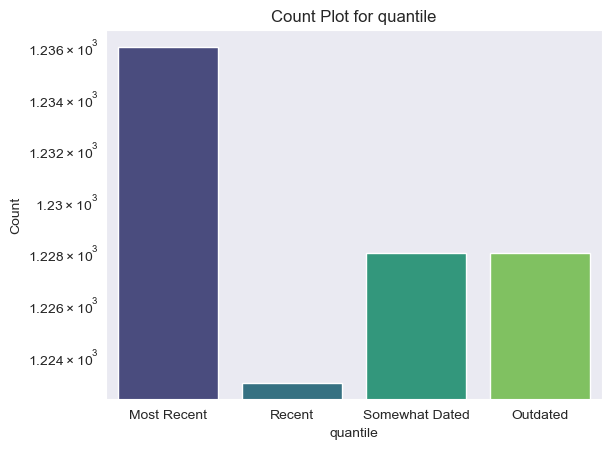

Most Recent       1236
Somewhat Dated    1228
Outdated          1228
Recent            1223
Name: quantile, dtype: int64


In [14]:
def summary_plots(df, num_cols=None, cat_cols=None, log_scale=False):
    """
    Generate summary plots for numerical and categorical columns in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - num_cols (list, optional): List of numerical column names. Defaults to None.
    - cat_cols (list, optional): List of categorical column names. Defaults to None.
    """

    # Plot histograms and box plots for numerical columns
    if num_cols is not None:
        for col in num_cols:
            # Create subplots for histograms and boxplots
            fig, axes = plt.subplots(1, 2)

            # Histogram
            sns.histplot(df[col], bins=10, kde=True, color='darkgreen', ax=axes[0])
            axes[0].set_title(f'Histogram for {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel('Frequency')
            axes[0].set_yscale('log') if log_scale == True else _

            # Box plot
            sns.boxplot(df[col], color='mediumpurple', ax=axes[1])
            axes[1].set_title(f'Box plot for {col}')
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('Frequency')
            axes[1].set_yscale('log') if log_scale == True else _

            # Adjust layout
            plt.tight_layout()

            # Show the plots
            plt.show()

            # Display the counts of unique values in the column
            print(df[col].value_counts())

    # Plot count plots for categorical columns
    if cat_cols is not None:
        for col in cat_cols:
            sns.countplot(x=col, data=df, palette='viridis')
            plt.title(f'Count Plot for {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.yscale('log') if log_scale == True else _

            # Show the plots
            plt.show()

            # Display the counts of unique values in the column
            print(df[col].value_counts())


# Generate summary plots for numerical and categorical columns
summary_plots(reviews, ['day_diff'], ['overall', 'quantile'], log_scale=True)

# 4. Data Analysis

## 4.1 Rating Product

In [15]:
# Calculate mean overall ratings for each recency quantile
quantile_means = reviews.groupby('quantile')['overall'].mean()

# Display mean ratings by recency
quantile_means

quantile
Most Recent       4.695793
Recent            4.636141
Somewhat Dated    4.571661
Outdated          4.446254
Name: overall, dtype: float64

In [16]:
# Given weights for each quantile
weights = [0.4, 0.3, 0.2, 0.1]

# Calculate the weighted average
weighted_average = 0
for idx, w in enumerate(weights):
    weighted_average += w * quantile_means[idx]

# Display the calculated weighted average
print("Weighted average:", round(weighted_average, 2))

Weighted average: 4.63


## 4.2 Sorting Reviews

In [17]:
reviews.sort_values(by='wilson_lower_bound', ascending=False).head()

,reviewTime,day_diff,overall,helpful_yes,helpful_no,total_vote,quantile,helpfulness_score_diff,positive_vote_percentage,wilson_lower_bound
2031,2013-01-05,702,5.0,1952,68,2020,Outdated,1884,0.966337,0.957544
3449,2012-09-26,803,5.0,1428,77,1505,Outdated,1351,0.948837,0.936519
4212,2013-05-08,579,1.0,1568,126,1694,Somewhat Dated,1442,0.925620,0.912139
317,2012-02-09,1033,1.0,422,73,495,Outdated,349,0.852525,0.818577
4672,2014-07-03,158,5.0,45,4,49,Most Recent,41,0.918367,0.808109
